<a href="https://colab.research.google.com/github/gcv-tec/Examen1/blob/main/lastmile_delivery_operations_mit_lift_lab_serving_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files 
files.upload()

Saving lastmile_delivery_operations_mit_lift_lab_serving_customer.csv to lastmile_delivery_operations_mit_lift_lab_serving_customer.csv


{'lastmile_delivery_operations_mit_lift_lab_serving_customer.csv': b'_child_record_id,_record_id,_parent_id,_title,_version,_created_at,_updated_at,_created_by,_updated_by,_index,_geometry,_latitude,_longitude,_changeset_id,_created_duration,_updated_duration,_edited_duration,name_of_the_store,entering_the_store,number_of_customers_in_store,number_of_suppliers_in_store,picture_cargo_being_delivered,picture_cargo_being_delivered_captions,picture_cargo_being_delivered_urls,number_of_cases_boxes_delivered,trolley_in_use,leaving_the_store\r\n12645bc3-33b6-4cc0-9c8e-9d8e6f35aa01,04e64464-3fbd-4ce1-99d8-5364e1567e8c,04e64464-3fbd-4ce1-99d8-5364e1567e8c,La fete,1,2022-11-12 18:00:54 UTC,2022-11-12 18:02:03 UTC,Juan Carlos Bejarano Moreno,Juan Carlos Bejarano Moreno,0,SRID=4326;POINT(-98.2338643 19.0596667),19.0596667,-98.2338643,1f557f2f-5ba3-4de9-aa53-86fc8bc120eb,61,3,64,La fete,23:50,1,1,"https://web.fulcrumapp.com/photos/view?photos=9d0cc14b-175b-4c67-b0fb-9f517e1f1f86,c629d43a-3d41-4515-

In [ ]:
#Carga desde un archivo .csv sin indice y convertimos a dataframe
data = pd.read_csv('lastmile_delivery_operations_mit_lift_lab_serving_customer.csv')
data

In [4]:
#Checamos la información que contiene nuestro dataframe para tener una vista general y saber como manejar de mejor
#manera los datos
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   _child_record_id                        35 non-null     object 
 1   _record_id                              35 non-null     object 
 2   _parent_id                              35 non-null     object 
 3   _title                                  35 non-null     object 
 4   _version                                35 non-null     int64  
 5   _created_at                             35 non-null     object 
 6   _updated_at                             35 non-null     object 
 7   _created_by                             35 non-null     object 
 8   _updated_by                             35 non-null     object 
 9   _index                                  35 non-null     int64  
 10  _geometry                               35 non-null     object 


In [ ]:
#Corroboramos valores nulos
valores_nulos = data.isnull().sum()
valores_nulos

In [ ]:
#En este caso solo reconozco tres variables cuantitativas que pueden ser de interés para el análisis. Estas variables son 'number_of_customers_in_store'
#  'number_of_suppliers_in_store' y 'number_of_cases_boxes_delivered'. Estas variables no tienen datos nulos por lo que pasaré directamente a sustituir
# los valores atípicos. Pero primero creamos nuestro contenedor de cuantitativos.
filtro_cuant = data.iloc[: ,[19,20,24]]
filtro_cuant 
filtro_cuant.info()

In [ ]:
#Corroboramos valores nulos de variables cuantitativas
valores_nulosn = filtro_cuant.isnull().sum()
valores_nulosn

In [7]:
#Filtro que selecciona todas las variables cualitativas y algunas cuantitativas pero que no son de interés
filtro_cualt = data.iloc[: , [0,1 ,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 17, 18, 21, 22, 22, 26]]


In [10]:
#Ahora limpiamos nuestras variables cualtitativas con .fillna
filtro_cualt = filtro_cualt.fillna('0')
filtro_cualt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   _child_record_id                        35 non-null     object 
 1   _record_id                              35 non-null     object 
 2   _parent_id                              35 non-null     object 
 3   _title                                  35 non-null     object 
 4   _version                                35 non-null     int64  
 5   _created_at                             35 non-null     object 
 6   _updated_at                             35 non-null     object 
 7   _created_by                             35 non-null     object 
 8   _updated_by                             35 non-null     object 
 9   _index                                  35 non-null     int64  
 10  _geometry                               35 non-null     object 


In [ ]:
#Entonces, recapitulando, creé un filtro que me permite almacenar todas las variables cuantitativas para posteriormente purgar los datos nulos
# utilizando el comando .fillna. Ahora encontraré los outliers de mis variables cuantitativas y los reemplazaré como mejor me parezca

Outliers

In [ ]:
#Una vez que tenemos ubicadas las variables cuantitativas podemos empezar a remplazar los outliers, en este caso utilizaré el método
# de rango interquartílico por que me ofrecerá rangos de dispersión más limitados, a mi parecer esta técnica es mejor que la de desviación estándar, 
# por que en este caso quiero que los límites estén menos dispersos

In [11]:
#Verificamos la información del contenedor de las variables cuantitativas
filtro_cuant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   number_of_customers_in_store     35 non-null     int64
 1   number_of_suppliers_in_store     35 non-null     int64
 2   number_of_cases_boxes_delivered  35 non-null     int64
dtypes: int64(3)
memory usage: 968.0 bytes


In [12]:
#Corroboramos valores nulos
valores_nulosn = filtro_cuant.isnull().sum().sum()
valores_nulosn

0

<Figure size 2880x2160 with 0 Axes>

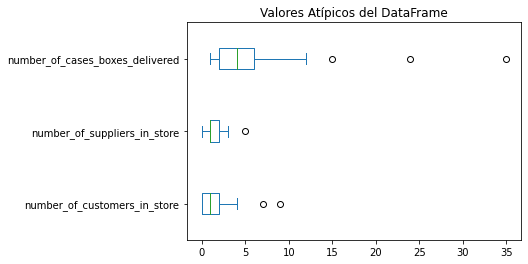

In [13]:
#Realizamos diagrama de caja de todas las variables cuantitativas para observar su comportamiento y comprobar que todavía hayan outliers
fig = plt.figure(figsize = (40,30))
filtro_cuant.plot(kind = 'box', vert = False)
plt.title('Valores Atípicos del DataFrame')
plt.show() #Dibujamos el diagrama

In [14]:
#Aplicamos el método de IQR para encontrar límites de valores atípicos
from numpy.lib.function_base import percentile
#Método aplicando cuartiles . Encuentro cuartiles 0.25 y 0.75
y = filtro_cuant

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print('Limite Superior permitido', Limite_Superior_iqr)
print('Limite inferior permitido', Limite_Inferior_iqr)

Limite Superior permitido number_of_customers_in_store        5.0
number_of_suppliers_in_store        3.5
number_of_cases_boxes_delivered    12.0
dtype: float64
Limite inferior permitido number_of_customers_in_store      -3.0
number_of_suppliers_in_store      -0.5
number_of_cases_boxes_delivered   -4.0
dtype: float64


In [15]:
#Encontramos Outliers
outliers_iqr = filtro_cuant[(y<Limite_Inferior_iqr)|(y>Limite_Superior_iqr)]
outliers_iqr

,number_of_customers_in_store,number_of_suppliers_in_store,number_of_cases_boxes_delivered
0,NaN,NaN,15.0
1,NaN,NaN,35.0
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,7.0,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [16]:
#Encontramos Insider
data_clean_iqr = filtro_cuant[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

,number_of_customers_in_store,number_of_suppliers_in_store,number_of_cases_boxes_delivered
0,1.0,1.0,NaN
1,0.0,2.0,NaN
2,0.0,1.0,12.0
3,0.0,1.0,3.0
4,0.0,1.0,1.0
5,NaN,1.0,3.0
6,1.0,1.0,3.0
7,2.0,1.0,3.0
8,2.0,1.0,2.0
9,3.0,2.0,11.0


In [17]:
#Corroboramos que ya no haya valores nulos
valores_nulos = data_clean_iqr.isnull().sum().sum()
valores_nulos

6

In [18]:
#Reemplazamos valores atípicos (nulos) del dataframe con 'mean'
#Realizamos una copia del DataFrame
data_clean = data_clean_iqr.copy()
data_clean = data_clean.fillna(round(data_clean_iqr.mean(),1))
data_clean  

,number_of_customers_in_store,number_of_suppliers_in_store,number_of_cases_boxes_delivered
0,1.0,1.0,4.3
1,0.0,2.0,4.3
2,0.0,1.0,12.0
3,0.0,1.0,3.0
4,0.0,1.0,1.0
5,1.3,1.0,3.0
6,1.0,1.0,3.0
7,2.0,1.0,3.0
8,2.0,1.0,2.0
9,3.0,2.0,11.0


In [19]:
#Concatenamos nuestros datos 

Datos_limpios = pd.concat([data_clean, filtro_cualt], axis=1)
Datos_limpios

,number_of_customers_in_store,number_of_suppliers_in_store,number_of_cases_boxes_delivered,_child_record_id,_record_id,_parent_id,_title,_version,_created_at,_updated_at,...,_index,_geometry,_latitude,_updated_duration,name_of_the_store,entering_the_store,picture_cargo_being_delivered,picture_cargo_being_delivered_captions,picture_cargo_being_delivered_captions,leaving_the_store
0,1.0,1.0,4.3,12645bc3-33b6-4cc0-9c8e-9d8e6f35aa01,04e64464-3fbd-4ce1-99d8-5364e1567e8c,04e64464-3fbd-4ce1-99d8-5364e1567e8c,La fete,1,2022-11-12 18:00:54 UTC,2022-11-12 18:02:03 UTC,...,0,SRID=4326;POINT(-98.2338643 19.0596667),19.059667,3,La fete,23:50,https://web.fulcrumapp.com/photos/view?photos=...,",",",",12:12
1,0.0,2.0,4.3,be0fc402-769c-41f8-90f1-1b0c9f151e7a,cda7b134-7827-4830-9337-53f46be4f8b4,cda7b134-7827-4830-9337-53f46be4f8b4,Casa Flores,1,2022-11-12 16:54:27 UTC,2022-11-12 16:55:48 UTC,...,0,SRID=4326;POINT(-98.2294218 19.0530488),19.053049,80,Casa Flores,10:35,https://web.fulcrumapp.com/photos/view?photos=...,",",",",11:00
2,0.0,1.0,12.0,634bbd94-8159-4733-973a-36ab89fb95d4,cbaab095-ad31-4145-804b-ddc218681802,cbaab095-ad31-4145-804b-ddc218681802,Super deux,1,2022-11-12 16:43:26 UTC,2022-11-12 16:45:00 UTC,...,0,SRID=4326;POINT(-98.232677 19.0517402),19.051740,61,Super deux,10:35,https://web.fulcrumapp.com/photos/view?photos=...,0,0,10:50
3,0.0,1.0,3.0,cf8e05ea-0af9-4a66-9d8b-27c0cf572236,68b5ecad-36b0-4172-b2b3-43aebd0485ec,68b5ecad-36b0-4172-b2b3-43aebd0485ec,Dansk,1,2022-11-12 16:37:55 UTC,2022-11-12 16:38:54 UTC,...,0,SRID=4326;POINT(-98.2339909 19.0529905),19.052990,7,Dansk,10:22,https://web.fulcrumapp.com/photos/view?photos=...,0,0,10:43
4,0.0,1.0,1.0,a1ff05ef-fe15-472e-ad6d-537c951afce4,3b19bb47-17f0-4d33-aa27-cf6890bacfe5,3b19bb47-17f0-4d33-aa27-cf6890bacfe5,Ink Factory,1,2022-11-12 16:19:57 UTC,2022-11-12 16:21:14 UTC,...,0,SRID=4326;POINT(-98.2301302 19.0553894),19.055389,76,Ink Factory,10:13,https://web.fulcrumapp.com/photos/view?photos=...,0,0,10:33
5,1.3,1.0,3.0,9e96f584-f5b2-4e7d-a754-a34fc89d5139,2b8a179a-521c-4ee3-a5ef-241fd1972b01,2b8a179a-521c-4ee3-a5ef-241fd1972b01,Breaking Bread Coffee,1,2022-11-12 15:59:13 UTC,2022-11-12 16:00:07 UTC,...,0,SRID=4326;POINT(-98.2271606 19.0531043),19.053104,53,Breaking Bread Coffee,09:48,https://web.fulcrumapp.com/photos/view?photos=...,0,0,10:06
6,1.0,1.0,3.0,531eb119-cab7-4ba9-8a25-489e91ec2a5a,3aa26fc8-4373-4387-ac50-4f7b0d417107,3aa26fc8-4373-4387-ac50-4f7b0d417107,Abarrotes vinos y licores La ranita,1,2022-11-10 18:31:16 UTC,2022-11-11 01:23:59 UTC,...,0,SRID=4326;POINT(-98.20348740564492 19.04590290...,19.045903,8,Abarrotes vinos y licores La ranita,12:29,0,0,0,12:33
7,2.0,1.0,3.0,17995e32-9ed3-4a27-8da3-b4e1d942ad36,5288fd44-2899-4765-9195-3f866d2e6d45,5288fd44-2899-4765-9195-3f866d2e6d45,Abarrotes vinos y licores La ranita,1,2022-11-11 04:30:19 UTC,2022-11-11 05:27:33 UTC,...,0,SRID=4326;POINT(-98.20328097193406 19.02348801...,19.023488,4,Abarrotes vinos y licores La ranita,12:56,0,0,0,13:01
8,2.0,1.0,2.0,009bf340-321a-4739-84b4-d80029770d10,d1662ccd-4787-4c38-969a-a9e8a01ad1c2,d1662ccd-4787-4c38-969a-a9e8a01ad1c2,Mony,1,2022-11-11 22:44:44 UTC,2022-11-11 22:46:40 UTC,...,0,SRID=4326;POINT(-98.19369792680496 19.04645890...,19.046459,116,Mony,16:28,0,0,0,16:28
9,3.0,2.0,11.0,c78336c3-d0ab-4e08-bc2e-f15af41f76fb,6f431744-a51b-4b36-b33f-13fb860ef131,6f431744-a51b-4b36-b33f-13fb860ef131,Tomales y molino Anita,1,2022-11-04 21:57:43 UTC,2022-11-04 22:11:37 UTC,...,0,SRID=4326;POINT(-98.3105623 19.0658682),19.065868,624,Tomales y molino Anita,16:02,https://web.fulcrumapp.com/photos/view?photos=...,0,0,16:19


In [20]:
Datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   number_of_customers_in_store            35 non-null     float64
 1   number_of_suppliers_in_store            35 non-null     float64
 2   number_of_cases_boxes_delivered         35 non-null     float64
 3   _child_record_id                        35 non-null     object 
 4   _record_id                              35 non-null     object 
 5   _parent_id                              35 non-null     object 
 6   _title                                  35 non-null     object 
 7   _version                                35 non-null     int64  
 8   _created_at                             35 non-null     object 
 9   _updated_at                             35 non-null     object 
 10  _created_by                             35 non-null     object 


In [21]:
#Converir Dataframe a csv
Datos_limpios.to_csv('Datos_limpios_last_mile_serv.csv')

In [22]:
from google.colab import files

files.download('Datos_limpios_last_mile_serv.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>